In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!nvidia-smi

Wed Nov 13 14:30:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="cNkpXJ2FeqMtBj1qor3u")
project = rf.workspace("cricomment").project("cricket-mjhp6-8tdvr")
version = project.version(2)
dataset = version.download("yolov8")



  Using cached roboflow-1.1.49-py3-none-any.whl.metadata (9.7 kB)
Using cached roboflow-1.1.49-py3-none-any.whl (80 kB)
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cricket-2 in yolov8:: 100%|██████████| 3754/3754 [00:01<00:00, 3304.32it/s]


In [ ]:

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 374MB/s]
New https://pypi.org/project/ultralytics/8.3.29 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/cricket-2/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None,

/content


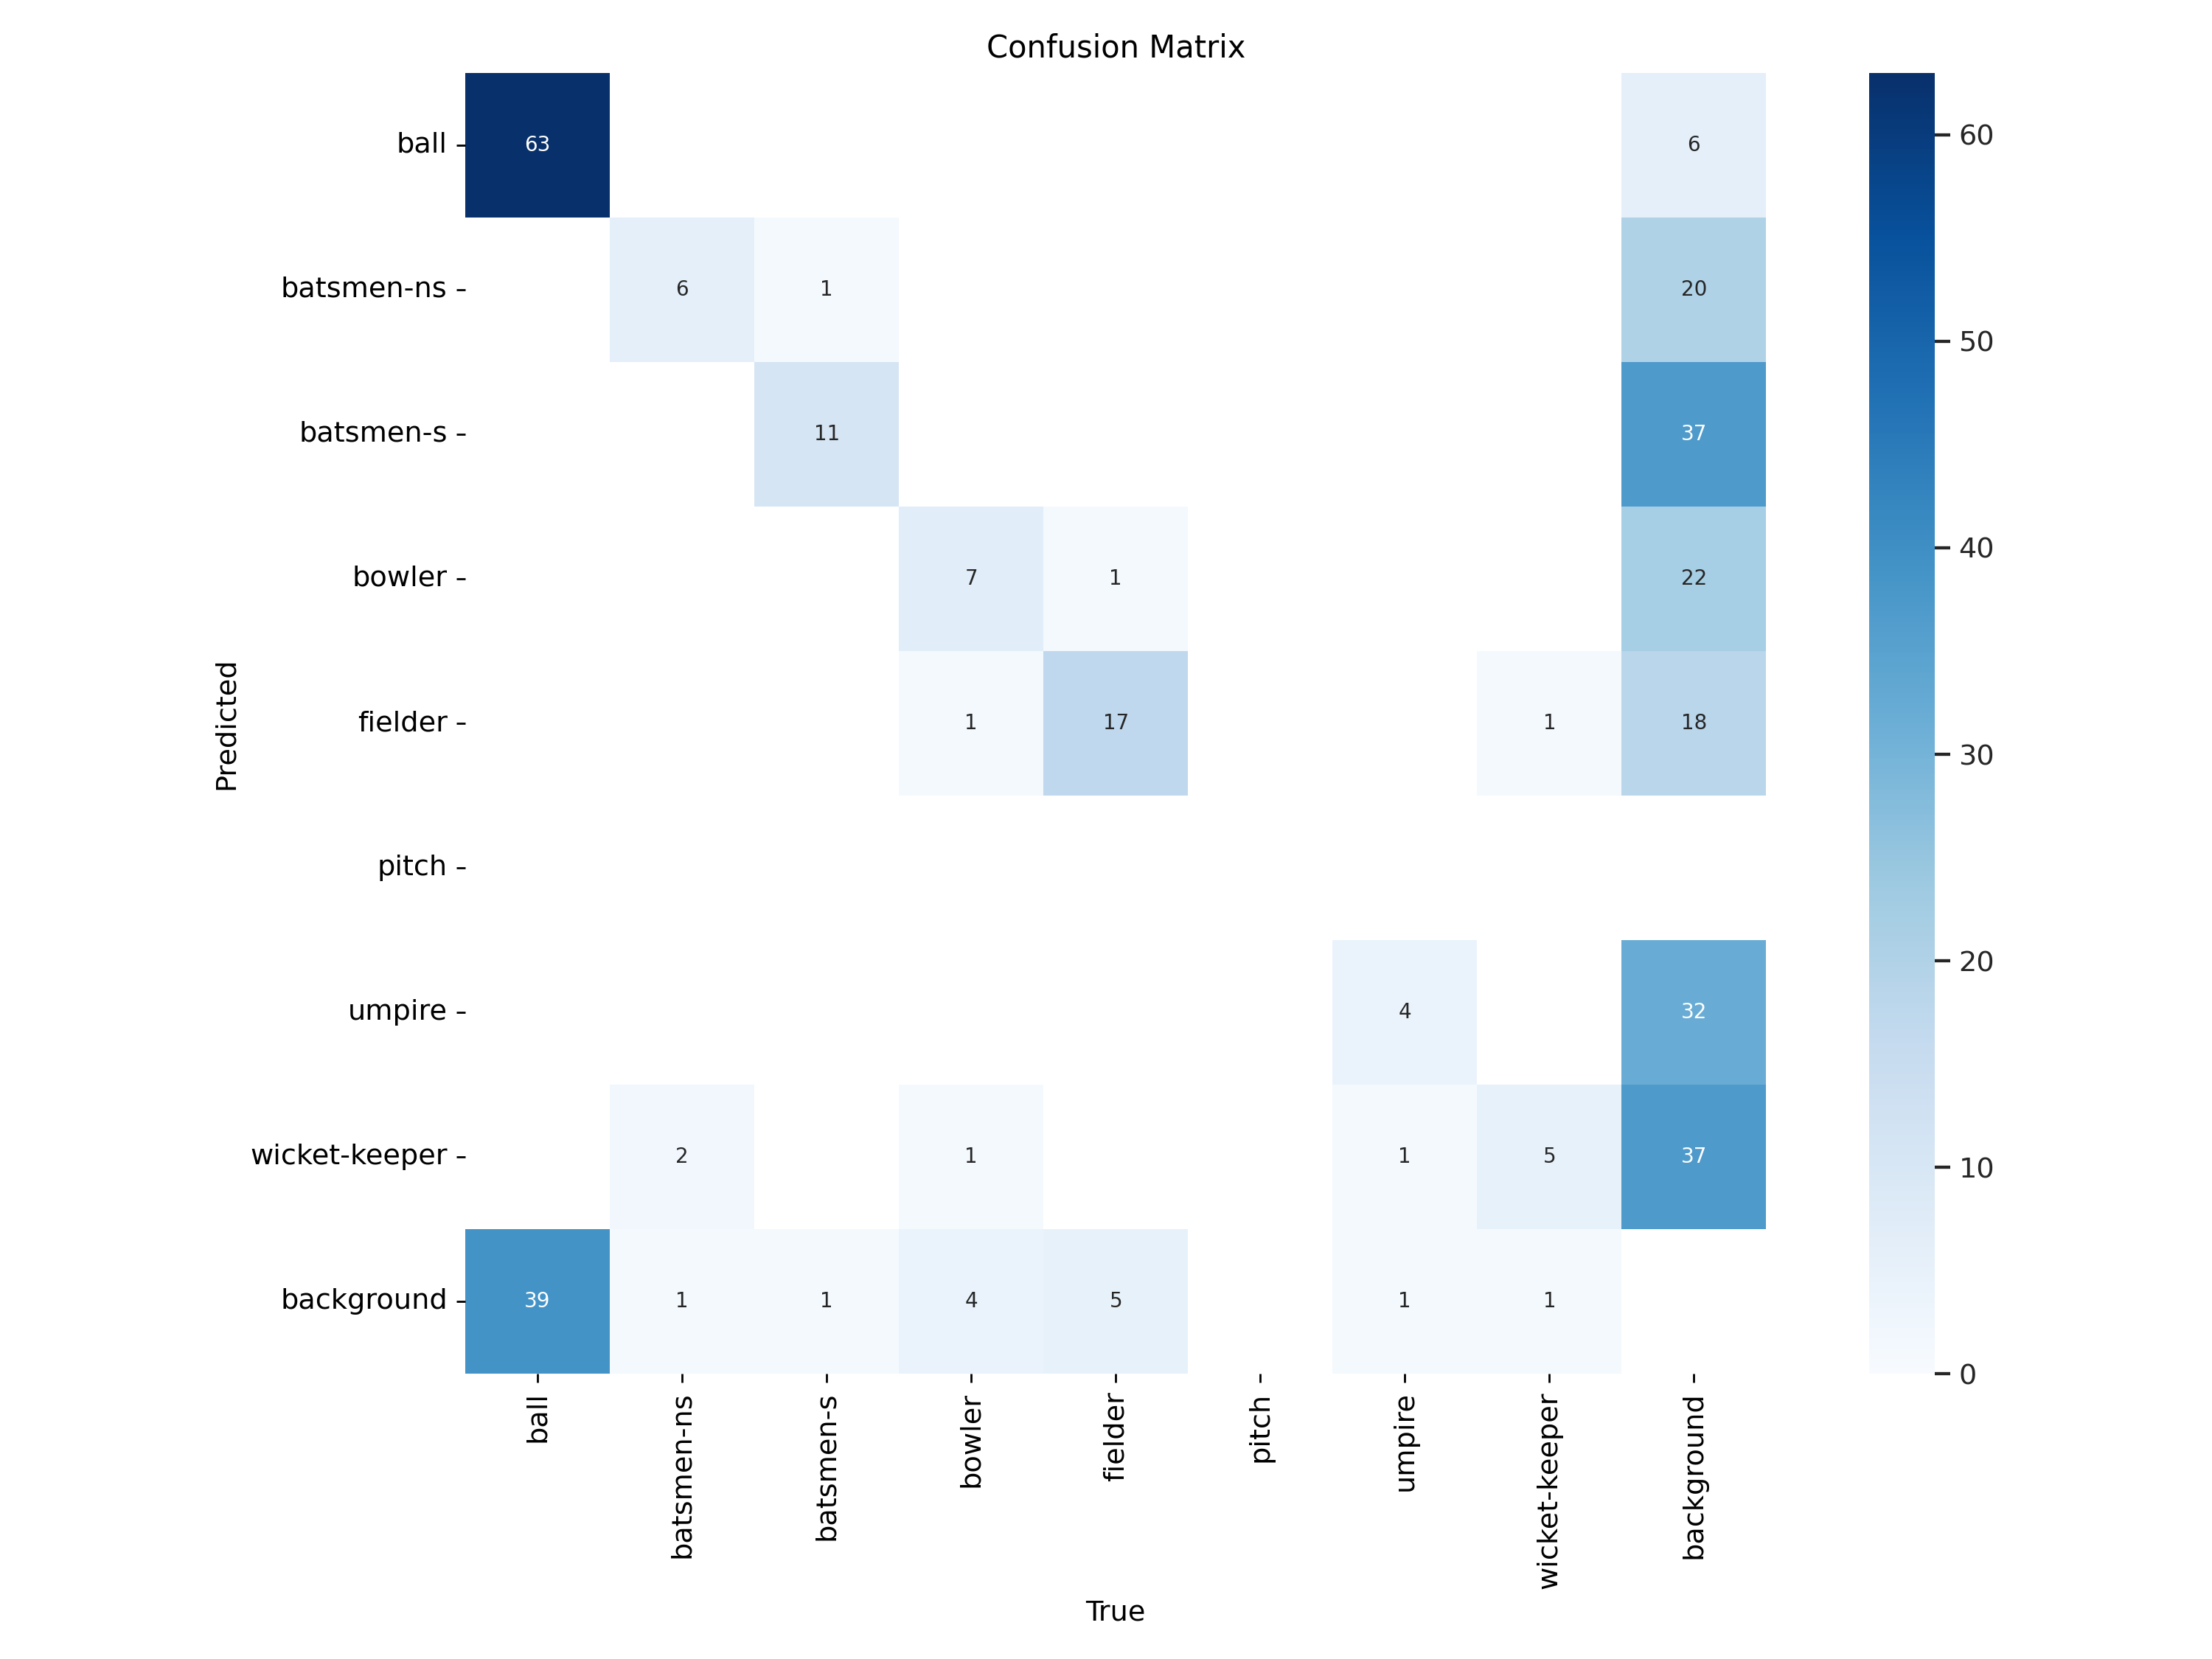

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


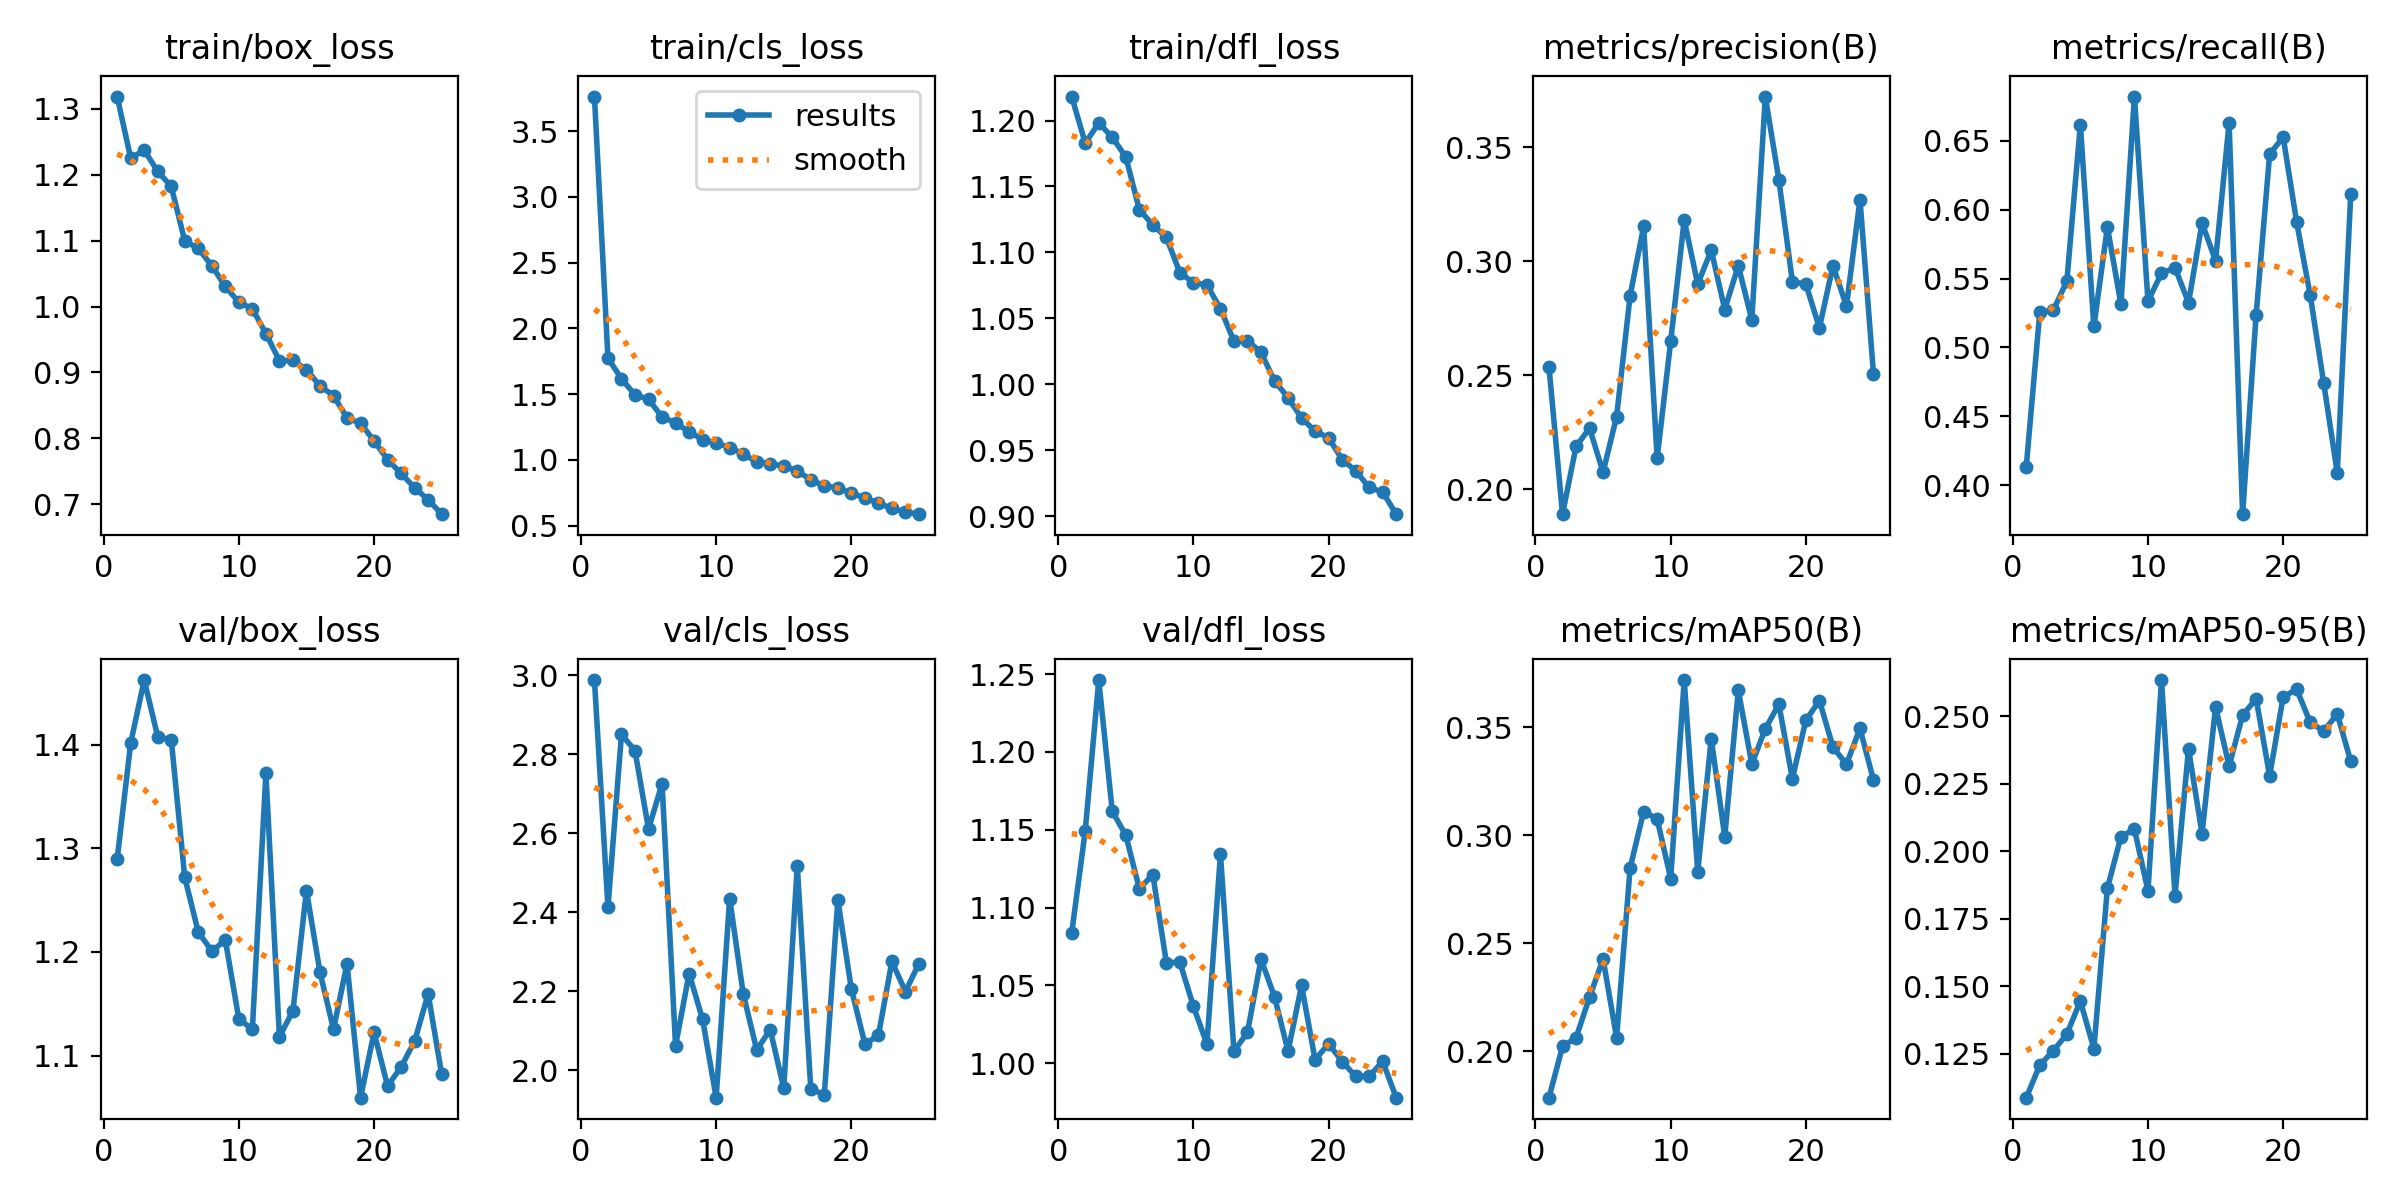

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


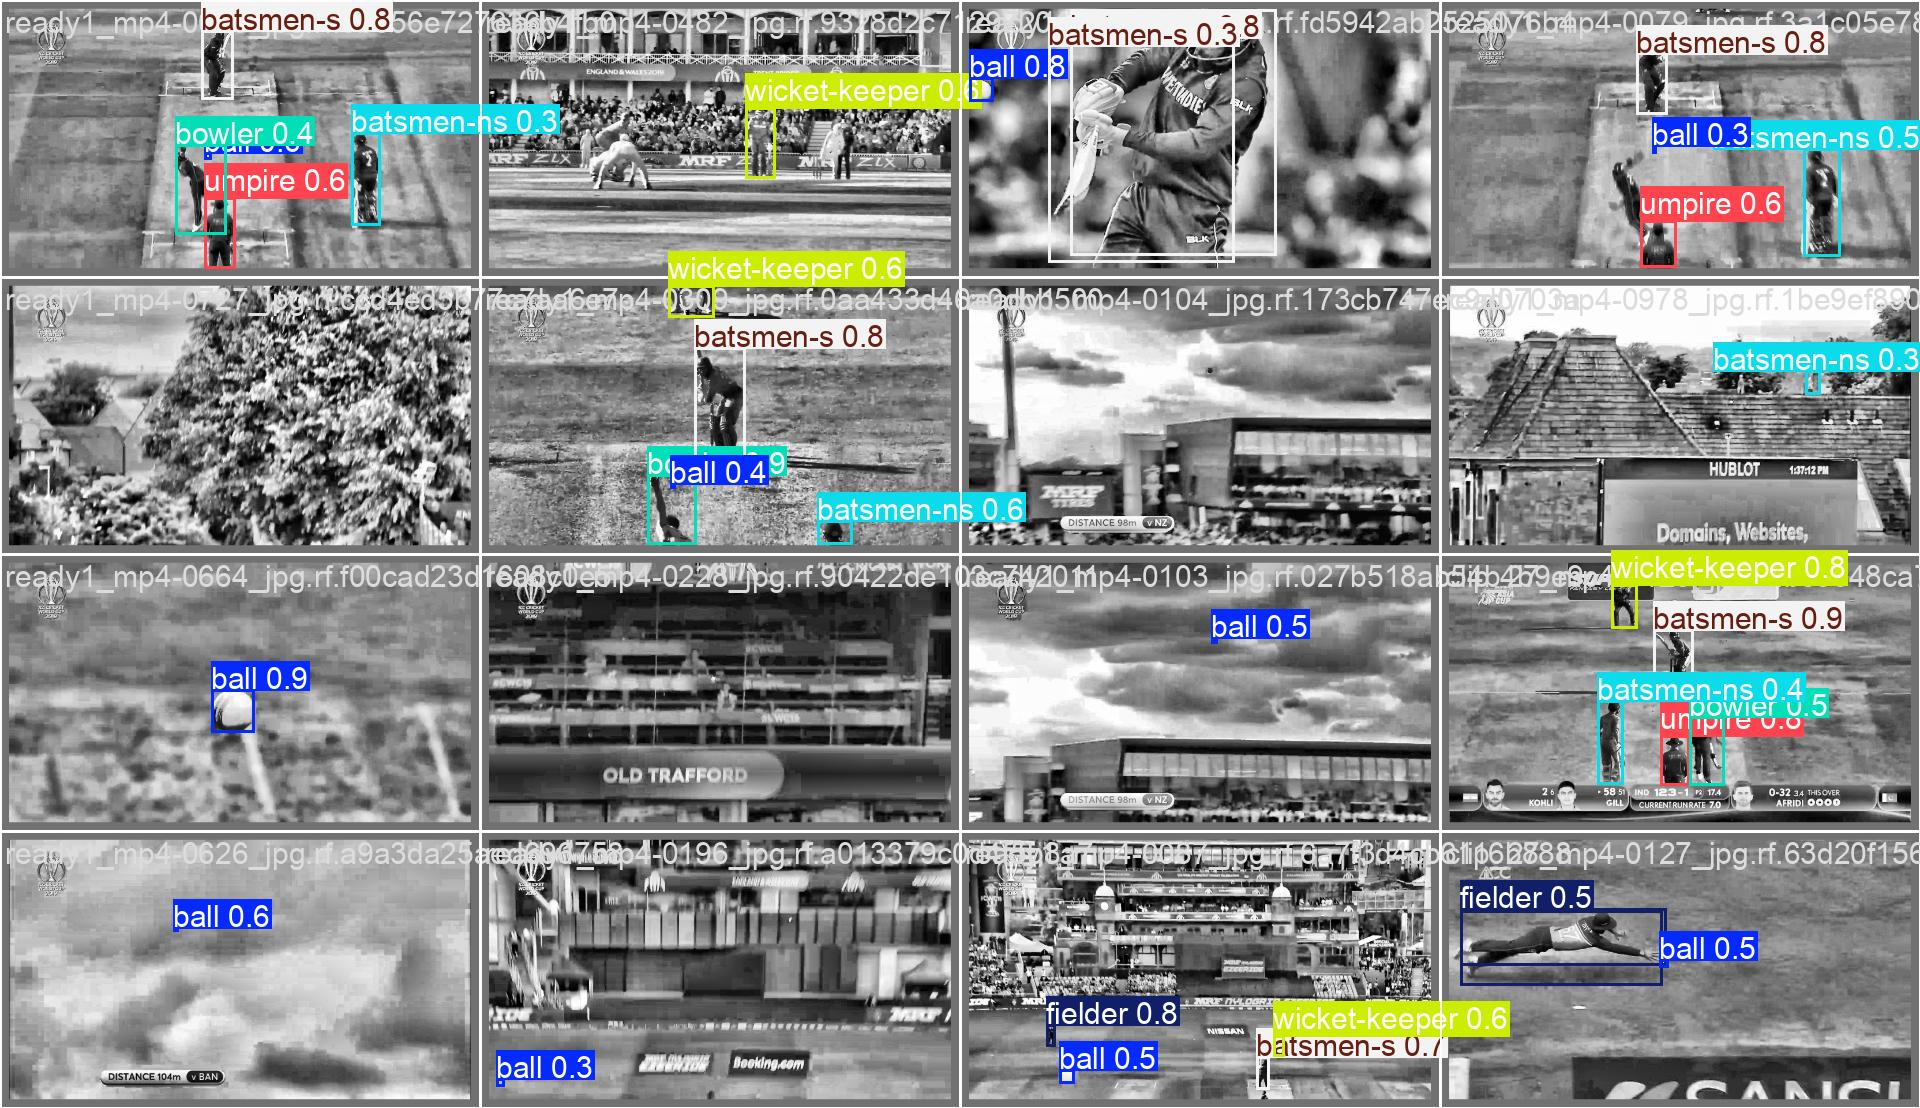

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/cricket-2/valid/labels.cache... 103 images, 0 backgrounds, 0 corrupt: 100% 103/103 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:04<00:00,  1.65it/s]
                   all        103        173      0.321      0.554       0.37      0.265
                  ball        102        102      0.956      0.423      0.706      0.328
            batsmen-ns          9          9      0.241      0.444      0.259      0.179
             batsmen-s         12         13       0.19      0.769      0.385      0.351
                bowler         13         13      0.205      0.308      0.151      0.105
               fielder         15         23      0.437      0.696      0.452      0.358
                umpire          6      

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/last.pt')

model.predict('/content/WhatsApp Video 2024-11-11 at 14.21.54_74b0bcc7.mp4',save =True)

ModuleNotFoundError: No module named 'ultralytics'

/content/sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')